In [ ]:
!pip install rdkit-pypi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Assigning a canonical representation
SMILES can be converted to a canonical form, where a unique representation is assigned to each molecule. This is useful for comparing molecules and ensuring consistency. Also addded the checking of valid smiles here.

In [ ]:
import pandas as pd
from rdkit import Chem

input_file = 'non-tox.smi'
output_file = 'non-toxic/non-tox_canonical_smiles.csv'

# Read the .smi file into a DataFrame
# Assuming the .smi file has one SMILES string per line
df = pd.read_csv(input_file, header=None, names=['SMILES'], sep='\t')
print(len(df))
# Define a function to convert SMILES to canonical SMILES
def canonicalize_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return Chem.MolToSmiles(mol, canonical=True)
        else:
            return None  # Return None for invalid SMILES
    except:
        return None  # Return None for invalid SMILES

# Apply the function to the 'SMILES' column to create a new 'Canonical_SMILES' column
df['Canonical_SMILES'] = df['SMILES'].apply(canonicalize_smiles)

# Remove rows where the canonical SMILES is None (i.e., invalid SMILES)
df = df.dropna(subset=['Canonical_SMILES'])
df = df.drop('SMILES', axis=1)
df = df.rename(columns={'Canonical_SMILES': 'SMILES'})

# Save the DataFrame with the new column to a CSV file
df.to_csv(output_file, index=False)

print(f"Canonical SMILES for valid molecules have been saved to {output_file}")
print(len(df))
print(df.columns)
df

# has two invalid smiles notation

10000


[16:29:08] Explicit valence for atom # 1 N, 4, is greater than permitted
[16:29:09] Explicit valence for atom # 0 P, 11, is greater than permitted


Canonical SMILES for valid molecules have been saved to non-toxic/non-tox_canonical_smiles.csv
9998
Index(['SMILES'], dtype='object')


SMILES
0                             Cn1cnc(C[C@H](N)C(=O)O)c1
1                                                 NCCCN
2                                         CCC(=O)C(=O)O
3                                          CCC(O)C(=O)O
4     COc1cc2c(cc1O)CC[C@@H]1[C@@H]2CC[C@]2(C)C(=O)C...
...                                                 ...
9995             NC(=O)CC(N)C(=O)NC(Cc1ccc(O)cc1)C(=O)O
9996                    CC(C)C(NC(=O)C(N)CC(N)=O)C(=O)O
9997                 NC(=O)CC(N)C(=O)NC(=O)CCC(N)C(=O)O
9998                        CC(NC(=O)C(N)CC(=O)O)C(=O)O
9999               N=C(N)NCCCC(NC(=O)C(N)CC(=O)O)C(=O)O

[9998 rows x 1 columns]

In [ ]:
import pandas as pd
from rdkit import Chem


input_file = 'tox.smi'
output_file = 'toxic/tox_canonical_smiles.csv'

# Read the .smi file into a DataFrame
# Assuming the .smi file has one SMILES string per line
df = pd.read_csv(input_file, header=None, names=['SMILES'], sep='\t')
print(len(df))
# Define a function to convert SMILES to canonical SMILES
def canonicalize_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return Chem.MolToSmiles(mol, canonical=True)
        else:
            return None  # Return None for invalid SMILES
    except:
        return None  # Return None for invalid SMILES

# Apply the function to the 'SMILES' column to create a new 'Canonical_SMILES' column
df['Canonical_SMILES'] = df['SMILES'].apply(canonicalize_smiles)

# Remove rows where the canonical SMILES is None (i.e., invalid SMILES)
df = df.dropna(subset=['Canonical_SMILES'])
df = df.drop('SMILES', axis=1)
df = df.rename(columns={'Canonical_SMILES': 'SMILES'})

# Save the DataFrame with the new column to a CSV file
df.to_csv(output_file, index=False)

print(f"Canonical SMILES for valid molecules have been saved to {output_file}")
print(len(df))
print(df.columns)
df

# has six invalid smiles notation

10000


[16:31:14] Explicit valence for atom # 0 H, 2, is greater than permitted
[16:31:14] WARNING: not removing hydrogen atom without neighbors
[16:31:14] WARNING: not removing hydrogen atom without neighbors
[16:31:14] WARNING: not removing hydrogen atom without neighbors
[16:31:14] Explicit valence for atom # 2 Si, 8, is greater than permitted
[16:31:14] Explicit valence for atom # 2 Si, 8, is greater than permitted
[16:31:14] Explicit valence for atom # 1 F, 2, is greater than permitted
[16:31:14] Explicit valence for atom # 1 B, 5, is greater than permitted


Canonical SMILES for valid molecules have been saved to toxic/tox_canonical_smiles.csv
9994
Index(['SMILES'], dtype='object')


[16:31:14] Explicit valence for atom # 0 F, 2, is greater than permitted


SMILES
0                    Nc1ccc2c(n1)[nH]c1ccccc12
1                                      C/C=N/O
2                                      CC(N)=O
3                           CC(=O)Nc1ccc(O)cc1
4     CC(=O)c1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1
...                                        ...
9995                   C[Si](Cl)(Cl)CCc1ccccc1
9996                        O=Cc1ccc(F)c(Br)c1
9997             C=C(C)C(=O)OC1CC(C)CC(C)(C)C1
9998     OCC(CO)(CO)COCC(CO)(CO)COCC(CO)(CO)CO
9999          CCC(C)(C)c1cc(O)c(C(C)(C)CC)cc1O

[9994 rows x 1 columns]

## Checking for different substructures


I searched up the substructures that are related to toxicity and drug activity. These are the findings:

**1. Functional Groups Known for Toxicity:**

Aromatic Amines: Often associated with mutagenicity and carcinogenicity (e.g., c1ccc(cc1)N for aniline).
Nitro Groups: Can be associated with toxic effects (e.g., O=[N+](O-)).

Halogenated Compounds: Halogens like chlorine, bromine, and fluorine can be linked to toxicity (e.g., Cl, Br).

Aldehydes and Ketones: Some aldehydes and ketones are known to be reactive and potentially toxic (e.g., O=CC for acetaldehyde).

**2. Functional Groups Associated with Drug Activity:**

Alcohols and Phenols: Common in many drugs and can influence toxicity (e.g., O for alcohol).

Carboxylic Acids: Can influence the solubility and reactivity of compounds (e.g., O=C(O)).

Esters and Amides: Often used in pharmaceuticals, and their presence can affect toxicity (e.g., O=C-O for esters, O=C-N for amides).

**3. Substructures with Known Toxicity Patterns:**

Quinones: Known to be reactive and potentially toxic (e.g., c1cc2c(c1=O)cccc2=O for quinone).

Sulfonamides: Sometimes associated with adverse reactions (e.g., S(=O)(=O)N).

Epoxides: Highly reactive and can be toxic (e.g., O1CO1 for an epoxide group).

#### performing for non-toxic molecules

the amibugity of smiles can be dealt with using sdf representation

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS, Descriptors, rdMolDescriptors

# Define the substructures (SMARTS patterns) to search for
substructures = {
    'Aromatic_Amines': 'c1ccc(cc1)N',
    'Nitro_Groups': '[N+](=O)[O-]',
    'Halogenated_Compounds_Cl': 'Cl',
    'Halogenated_Compounds_Br': 'Br',
    'Halogenated_Compounds_F': 'F',
    'Aldehydes_Ketones': 'C=O',
    'Alcohols_Phenols': '[OX2H]',
    'Carboxylic_Acids': 'C(=O)O',
    'Esters': 'C(=O)O',
    'Amides': 'C(=O)N',
    'Quinones': 'C1=CC(=O)C=CC1=O',
    'Sulfonamides': 'S(=O)(=O)N',
    'Epoxides': 'O1CO1'
}

# Function to check for substructures in a molecule
def check_substructures(mol, substructure_smarts):
    substructure_mol = Chem.MolFromSmarts(substructure_smarts)
    return mol.HasSubstructMatch(substructure_mol)

input_file = 'non-toxic/non-tox_canonical_smiles.csv'
output_file = 'non-toxic/non-tox_substructure_annotations.csv'

df = pd.read_csv(input_file)

# Check for each substructure in the molecules
for name, smarts in substructures.items():
    df[name] = df['SMILES'].apply(lambda x: check_substructures(Chem.MolFromSmiles(x), smarts))

df.to_csv(output_file, index=False)

df


SMILES  Aromatic_Amines  \
0                             Cn1cnc(C[C@H](N)C(=O)O)c1            False   
1                                                 NCCCN            False   
2                                         CCC(=O)C(=O)O            False   
3                                          CCC(O)C(=O)O            False   
4     COc1cc2c(cc1O)CC[C@@H]1[C@@H]2CC[C@]2(C)C(=O)C...            False   
...                                                 ...              ...   
9993             NC(=O)CC(N)C(=O)NC(Cc1ccc(O)cc1)C(=O)O            False   
9994                    CC(C)C(NC(=O)C(N)CC(N)=O)C(=O)O            False   
9995                 NC(=O)CC(N)C(=O)NC(=O)CCC(N)C(=O)O            False   
9996                        CC(NC(=O)C(N)CC(=O)O)C(=O)O            False   
9997               N=C(N)NCCCC(NC(=O)C(N)CC(=O)O)C(=O)O            False   

      Nitro_Groups  Halogenated_Compounds_Cl  Halogenated_Compounds_Br  \
0            False                     False                     False   
1            False                     False                     False   
2            False                     False                     False   
3            False                     False                     False   
4            False                     False                     False   
...            ...                       ...                       ...   
9993         False                     False                     False   
9994         False                     False                     False   
9995         False                     False                     False   
9996         False                     False                     False   
9997         False                     False                     False   

      Halogenated_Compounds_F  Aldehydes_Ketones  Alcohols_Phenols  \
0                       False               True              True   
1                       False              False             False   
2                       False               True              True   
3                       False               True              True   
4                       False               True              True   
...                       ...                ...               ...   
9993                    False               True              True   
9994                    False               True              True   
9995                    False               True              True   
9996                    False               True              True   
9997                    False               True              True   

      Carboxylic_Acids  Esters  Amides  Quinones  Sulfonamides  Epoxides  
0                 True    True   False     False         False     False  
1                False   False   False     False         False     False  
2                 True    True   False     False         False     False  
3                 True    True   False     False         False     False  
4                False   False   False     False         False     False  
...                ...     ...     ...       ...           ...       ...  
9993              True    True    True     False         False     False  
9994              True    True    True     False         False     False  
9995              True    True    True     False         False     False  
9996              True    True    True     False         False     False  
9997              True    True    True     False         False     False  

[9998 rows x 14 columns]

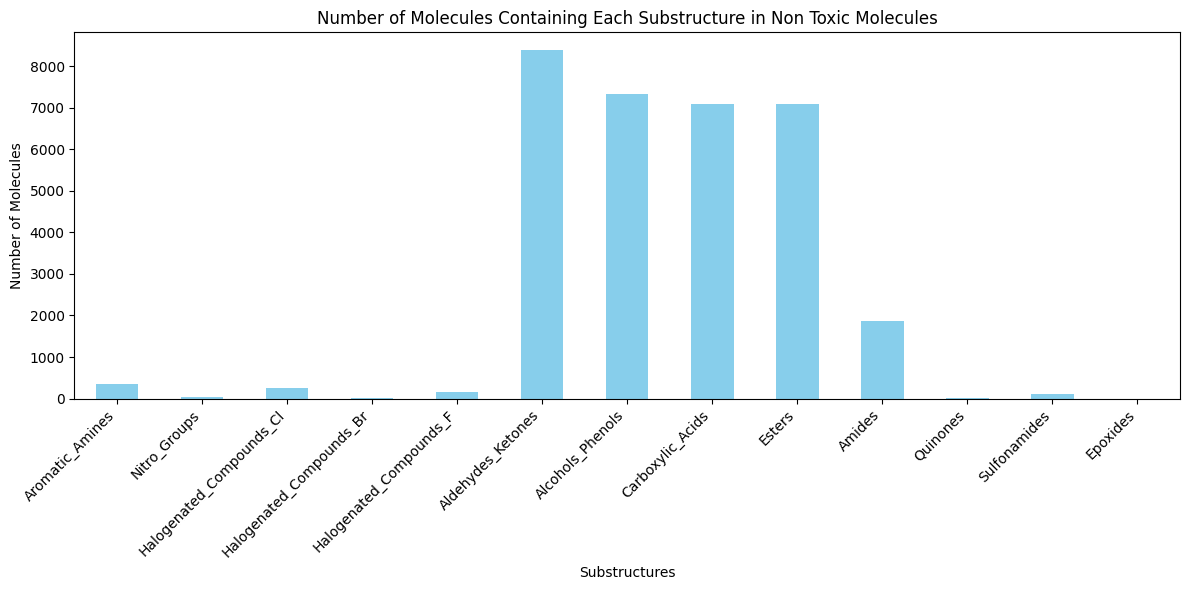

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of molecules containing each substructure
substructure_counts = df.iloc[:, 1:].sum()  # Sum across columns (skip the first column 'Canonical_SMILES')

plt.figure(figsize=(12, 6))
substructure_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Molecules Containing Each Substructure in Non Toxic Molecules')
plt.xlabel('Substructures')
plt.ylabel('Number of Molecules')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('non-toxic/non-tox_substructure_counts.png')
plt.show()

#### performing on toxic molecules

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS, Descriptors, rdMolDescriptors

# Define the substructures (SMARTS patterns) to search for
substructures = {
    'Aromatic_Amines': 'c1ccc(cc1)N',
    'Nitro_Groups': '[N+](=O)[O-]',
    'Halogenated_Compounds_Cl': 'Cl',
    'Halogenated_Compounds_Br': 'Br',
    'Halogenated_Compounds_F': 'F',
    'Aldehydes_Ketones': 'C=O',
    'Alcohols_Phenols': '[OX2H]',
    'Carboxylic_Acids': 'C(=O)O',
    'Esters': 'C(=O)O',
    'Amides': 'C(=O)N',
    'Quinones': 'C1=CC(=O)C=CC1=O',
    'Sulfonamides': 'S(=O)(=O)N',
    'Epoxides': 'O1CO1'
}

# Function to check for substructures in a molecule
def check_substructures(mol, substructure_smarts):
    substructure_mol = Chem.MolFromSmarts(substructure_smarts)
    return mol.HasSubstructMatch(substructure_mol)

input_file = 'toxic/tox_canonical_smiles.csv'
output_file = 'toxic/tox_substructure_annotations.csv'

df = pd.read_csv(input_file)

# Check for each substructure in the molecules
for name, smarts in substructures.items():
    df[name] = df['SMILES'].apply(lambda x: check_substructures(Chem.MolFromSmiles(x), smarts))

# Save the annotated DataFrame to a new CSV file
df.to_csv(output_file, index=False)

df


[16:39:52] WARNING: not removing hydrogen atom without neighbors
[16:39:53] WARNING: not removing hydrogen atom without neighbors
[16:39:54] WARNING: not removing hydrogen atom without neighbors
[16:39:54] WARNING: not removing hydrogen atom without neighbors
[16:39:55] WARNING: not removing hydrogen atom without neighbors
[16:39:55] WARNING: not removing hydrogen atom without neighbors
[16:39:56] WARNING: not removing hydrogen atom without neighbors
[16:39:57] WARNING: not removing hydrogen atom without neighbors
[16:39:57] WARNING: not removing hydrogen atom without neighbors
[16:39:58] WARNING: not removing hydrogen atom without neighbors
[16:39:59] WARNING: not removing hydrogen atom without neighbors
[16:39:59] WARNING: not removing hydrogen atom without neighbors
[16:40:00] WARNING: not removing hydrogen atom without neighbors


SMILES  Aromatic_Amines  Nitro_Groups  \
0                    Nc1ccc2c(n1)[nH]c1ccccc12            False         False   
1                                      C/C=N/O            False         False   
2                                      CC(N)=O            False         False   
3                           CC(=O)Nc1ccc(O)cc1             True         False   
4     CC(=O)c1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1            False         False   
...                                        ...              ...           ...   
9989                   C[Si](Cl)(Cl)CCc1ccccc1            False         False   
9990                        O=Cc1ccc(F)c(Br)c1            False         False   
9991             C=C(C)C(=O)OC1CC(C)CC(C)(C)C1            False         False   
9992     OCC(CO)(CO)COCC(CO)(CO)COCC(CO)(CO)CO            False         False   
9993          CCC(C)(C)c1cc(O)c(C(C)(C)CC)cc1O            False         False   

      Halogenated_Compounds_Cl  Halogenated_Compounds_Br  \
0                        False                     False   
1                        False                     False   
2                        False                     False   
3                        False                     False   
4                        False                     False   
...                        ...                       ...   
9989                      True                     False   
9990                     False                      True   
9991                     False                     False   
9992                     False                     False   
9993                     False                     False   

      Halogenated_Compounds_F  Aldehydes_Ketones  Alcohols_Phenols  \
0                       False              False             False   
1                       False              False              True   
2                       False               True             False   
3                       False               True              True   
4                       False               True             False   
...                       ...                ...               ...   
9989                    False              False             False   
9990                     True               True             False   
9991                    False               True             False   
9992                    False              False              True   
9993                    False              False              True   

      Carboxylic_Acids  Esters  Amides  Quinones  Sulfonamides  Epoxides  
0                False   False   False     False         False     False  
1                False   False   False     False         False     False  
2                False   False    True     False         False     False  
3                False   False    True     False         False     False  
4                False   False    True     False          True     False  
...                ...     ...     ...       ...           ...       ...  
9989             False   False   False     False         False     False  
9990             False   False   False     False         False     False  
9991              True    True   False     False         False     False  
9992             False   False   False     False         False     False  
9993             False   False   False     False         False     False  

[9994 rows x 14 columns]

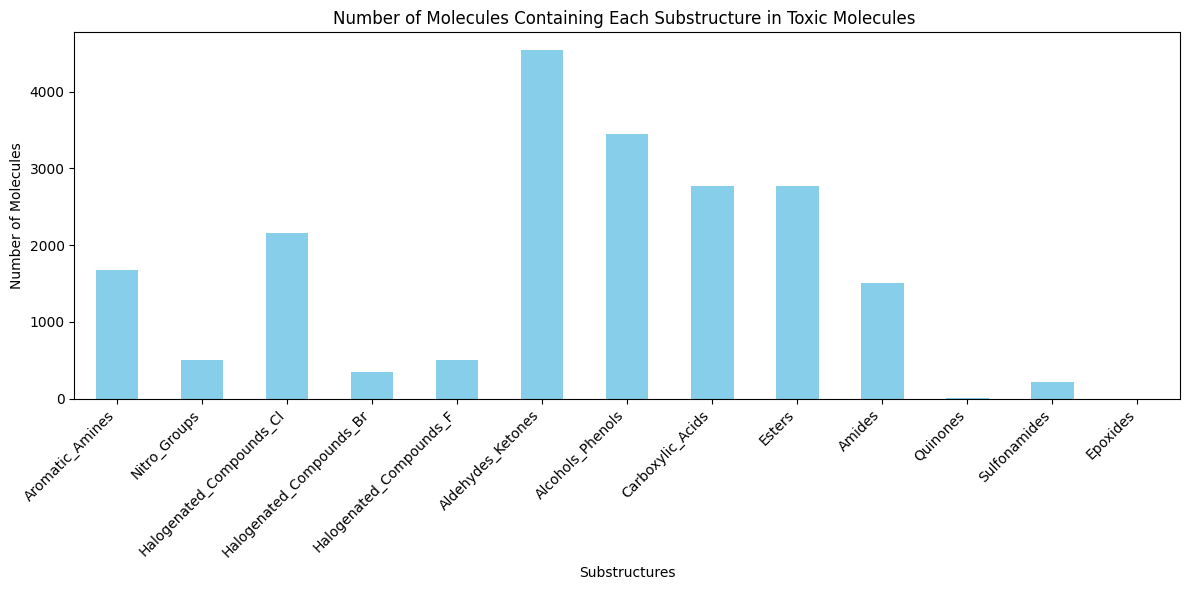

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of molecules containing each substructure
substructure_counts = df.iloc[:, 1:].sum()  # Sum across columns (skip the first column 'Canonical_SMILES')

plt.figure(figsize=(12, 6))
substructure_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Molecules Containing Each Substructure in Toxic Molecules ')
plt.xlabel('Substructures')
plt.ylabel('Number of Molecules')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('toxic/tox_substructure_counts.png')
plt.show()

### NOTE

*   It is a wrong practise to compare tanimoto similarity from SMILES notations directly as simple string representation dont capture molecular similarity like chemical struture. SMILES should be represented as fingerprints and then tanimoto similarity should be used.  
*   In the long run, if we plan to make a featrue matrix of descriptors and fingerprints, we can eliminate smiles with tanimoto when fingerprints are calculated.
# *   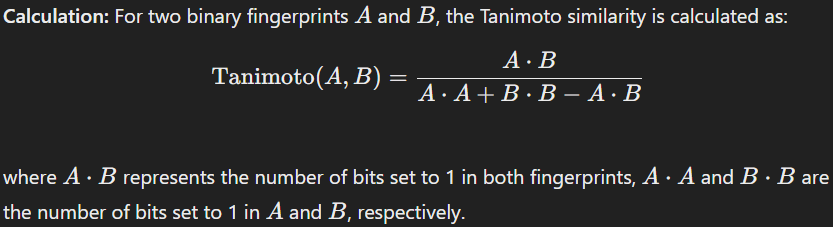







## Checking the length of various SMILES notations

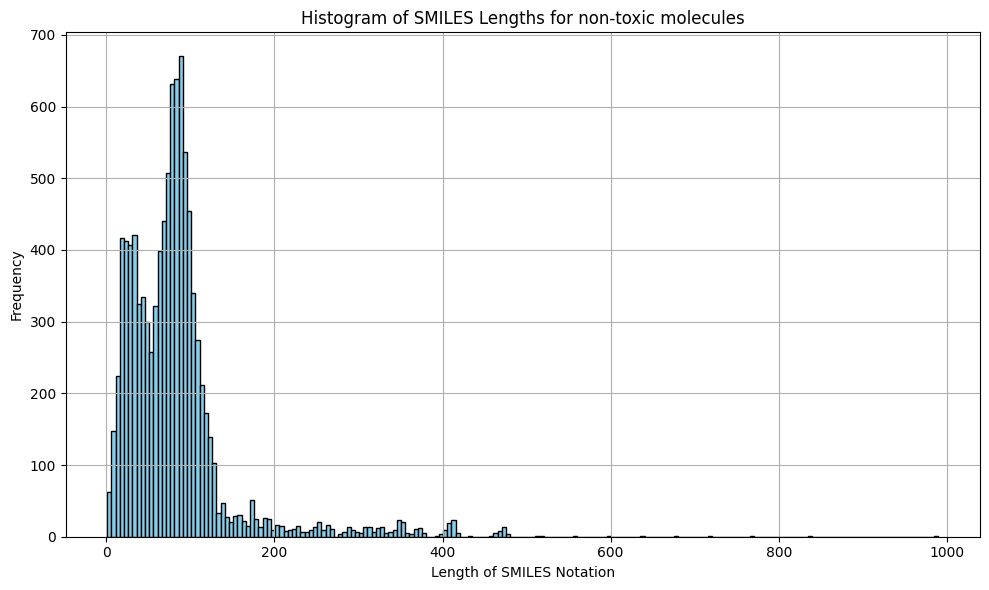

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the canonical SMILES from the CSV file
input_file = 'non-toxic/non-tox_canonical_smiles.csv'
df = pd.read_csv(input_file)

# Calculate the length of each SMILES notation
df['SMILES_Length'] = df['SMILES'].apply(len)

# Plotting the histogram
plt.figure(figsize=(10, 6))

# Plot a histogram of SMILES lengths
plt.hist(df['SMILES_Length'], bins='auto', color='skyblue', edgecolor='black')

plt.title('Histogram of SMILES Lengths for non-toxic molecules')
plt.xlabel('Length of SMILES Notation')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.savefig('non-toxic/non-tox_smiles_length_histogram.png')
plt.show()



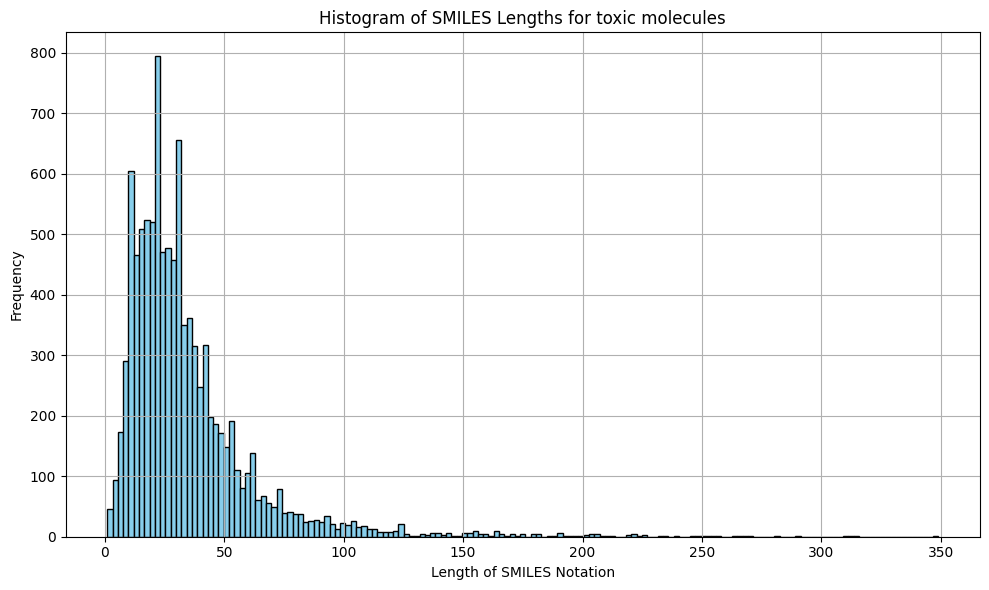

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the canonical SMILES from the CSV file
input_file = 'toxic/tox_canonical_smiles.csv'  # Replace with your file path
df = pd.read_csv(input_file)

# Calculate the length of each SMILES notation
df['SMILES_Length'] = df['SMILES'].apply(len)

# Calculate the length of each SMILES notation
df['SMILES_Length'] = df['SMILES'].apply(len)

# Plotting the histogram
plt.figure(figsize=(10, 6))

# Plot a histogram of SMILES lengths
plt.hist(df['SMILES_Length'], bins='auto', color='skyblue', edgecolor='black')

plt.title('Histogram of SMILES Lengths for toxic molecules')
plt.xlabel('Length of SMILES Notation')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('toxic/tox_smiles_length_histogram.png')
plt.show()


#### small comparsion analysis

In [ ]:
import pandas as pd

def analyze_smiles_lengths(file_path):
    # Load the canonical SMILES from the CSV file
    df = pd.read_csv(file_path)

    # Calculate the length of each SMILES notation
    df['SMILES_Length'] = df['SMILES'].apply(len)

    # Get the dominating length (most frequent length)
    length_counts = df['SMILES_Length'].value_counts()
    dominating_length = length_counts.idxmax()
    dominating_count = length_counts.max()

    # Get the max and min lengths
    max_length = df['SMILES_Length'].max()
    min_length = df['SMILES_Length'].min()

    return dominating_length, dominating_count, max_length, min_length

# Paths to the input CSV files
file1 = 'non-toxic/non-tox_canonical_smiles.csv'  # Replace with your file path
file2 = 'toxic/tox_canonical_smiles.csv'  # Replace with your file path

# Analyze the first file
dom_length1, dom_count1, max_length1, min_length1 = analyze_smiles_lengths(file1)
print(f"\nNon-Toxic Molecule Analysis:")
print(f"Dominating Length: {dom_length1}")
print(f"Count of Dominating Length: {dom_count1}")
print(f"Max Length: {max_length1}")
print(f"Min Length: {min_length1}")

# Analyze the second file
dom_length2, dom_count2, max_length2, min_length2 = analyze_smiles_lengths(file2)
print(f"\nToxic Molecule Analysis:")
print(f"Dominating Length: {dom_length2}")
print(f"Count of Dominating Length: {dom_count2}")
print(f"Max Length: {max_length2}")
print(f"Min Length: {min_length2}")

# Compare the results
print(f"\nComparison:")
print(f"Non-Toxic Molecule Dominating Length: {dom_length1}, Toxic Molecule Dominating Length: {dom_length2}")
print(f"Non-Toxic Molecule  Max Length: {max_length1}, Toxic Molecule Max Length: {max_length2}")
print(f"Non-Toxic Molecule  Min Length: {min_length1}, Toxic Molecule Min Length: {min_length2}")



Non-Toxic Molecule Analysis:
Dominating Length: 86
Count of Dominating Length: 144
Max Length: 990
Min Length: 1

Toxic Molecule Analysis:
Dominating Length: 20
Count of Dominating Length: 286
Max Length: 349
Min Length: 1

Comparison:
Non-Toxic Molecule Dominating Length: 86, Toxic Molecule Dominating Length: 20
Non-Toxic Molecule  Max Length: 990, Toxic Molecule Max Length: 349
Non-Toxic Molecule  Min Length: 1, Toxic Molecule Min Length: 1


## Checking the no:of smiles notations with H atom explicity mentioned

In [ ]:
import pandas as pd

# Load the SMILES data
file_path = r'non-toxic/non-tox_canonical_smiles.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Assuming your file has a column 'SMILES' containing the SMILES strings
smiles_list = data['SMILES']

# Function to check if 'H' is present in the SMILES string
def contains_hydrogen(smiles):
    return 'H' in smiles

# Apply the function to create a list of SMILES strings containing 'H'
hydrogen_smiles = smiles_list[smiles_list.apply(contains_hydrogen)].tolist()

# Count the number of SMILES strings that contain 'H'
hydrogen_count = len(hydrogen_smiles)

# Print the results
print(f"Number of SMILES with explicit hydrogen atoms: {hydrogen_count}")
print(f"List of SMILES with explicit hydrogen atoms: {hydrogen_smiles}")
# Save the list of SMILES with explicit hydrogen atoms to a CSV file
output_file_path = r'non-toxic/non-tox_hydrogen_smiles.csv'  # Replace with your desired output file path
pd.DataFrame(hydrogen_smiles, columns=['SMILES']).to_csv(output_file_path, index=False)

print(f"List of SMILES with explicit hydrogen atoms has been saved to {output_file_path}")


Number of SMILES with explicit hydrogen atoms: 7461
List of SMILES with explicit hydrogen atoms: ['Cn1cnc(C[C@H](N)C(=O)O)c1', 'COc1cc2c(cc1O)CC[C@@H]1[C@@H]2CC[C@]2(C)C(=O)CC[C@@H]12', 'C[C@@H](O)CC(=O)O', 'O=c1ccn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]1', 'Nc1ccn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)n1', 'C[C@]12CCC(=O)C=C1CC[C@@H]1C2CC[C@@]2(C)C1CC[C@]2(O)C(=O)CO', 'C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C@@H]1CC[C@@H]2C(=O)CO', 'N[C@@H](Cc1ccc(O)c(I)c1)C(=O)O', 'C[C@@H](CO)C(=O)O', 'CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@H](CO)[C@H](O)[C@H](OS(=O)(=O)O)[C@H]1O)NC(=O)CCCCCCCCCCCCCCCCCCCCCCC', 'CC(O)C(O)C1CNc2[nH]c(N)nc(=O)c2N1', 'O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21', 'C[C@]12CCC(O)C[C@@H]1CC[C@@H]1[C@@H]2CC[C@]2(C)C(=O)CC[C@@H]12', 'CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2C3=CC=C4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@]12C', 'NCCC(=O)N[C@@H](Cc1cnc[nH]1)C(=O)O', 'Nc1ncnc2nc[nH]c12', 'CC(CCC(=O)NCCS(=O)(=O)O)C1CCC2C3C(C[C@H](O)C12C)C1(C)CC[C@@H](O)C[C@H]1C[C@H]3O', 'C[C@]12CCC(=O)C=C1CC

In [ ]:
import pandas as pd

# Load the SMILES data
file_path = r'toxic/tox_canonical_smiles.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Assuming your file has a column 'SMILES' containing the SMILES strings
smiles_list = data['SMILES']

# Function to check if 'H' is present in the SMILES string
def contains_hydrogen(smiles):
    return 'H' in smiles

# Apply the function to create a list of SMILES strings containing 'H'
hydrogen_smiles = smiles_list[smiles_list.apply(contains_hydrogen)].tolist()

# Count the number of SMILES strings that contain 'H'
hydrogen_count = len(hydrogen_smiles)

# Print the results
print(f"Number of SMILES with explicit hydrogen atoms: {hydrogen_count}")
print(f"List of SMILES with explicit hydrogen atoms: {hydrogen_smiles}")
# Save the list of SMILES with explicit hydrogen atoms to a CSV file
output_file_path = r'toxic/tox_hydrogen_smiles.csv'  # Replace with your desired output file path
pd.DataFrame(hydrogen_smiles, columns=['SMILES']).to_csv(output_file_path, index=False)

print(f"List of SMILES with explicit hydrogen atoms has been saved to {output_file_path}")


Number of SMILES with explicit hydrogen atoms: 1612
List of SMILES with explicit hydrogen atoms: ['Nc1ccc2c(n1)[nH]c1ccccc12', 'CC(=O)N[C@@H](CS)C(=O)O', 'Cc1c2oc3c(C)ccc(C(=O)N[C@@H]4C(=O)N[C@H](C(C)C)C(=O)N5CCC[C@H]5C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)O[C@@H]4C)c3nc-2c(C(=O)N[C@@H]2C(=O)N[C@H](C(C)C)C(=O)N3CCC[C@H]3C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)O[C@@H]2C)c(N)c1=O', 'COc1cc2c(c3oc(=O)c4c(c13)CC[C@H]4O)[C@@H]1C=CO[C@H]1O2', 'ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@H]([C@@H]4C=C[C@H]3C4)[C@@]1(Cl)C2(Cl)Cl', 'Nc1nc[nH]n1', '[Cl-].[NH4+]', 'O=C([O-])CC(O)(CC(=O)O)C(=O)[O-].[NH4+].[NH4+]', '[NH4+].[OH-]', 'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O.O.O.O', 'OC[C@@H](O)[C@H]1O[C@@H]2O[C@H](C(Cl)(Cl)Cl)O[C@@H]2[C@H]1O', 'O=C1O[C@H]([C@@H](O)CO)C([O-])=C1O.[Na+]', 'O=C1O[C@H]([C@@H](O)CO)C(O)=C1O', 'COC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](N)CC(=O)O', 'CN1[C@@H]2CC[C@H]1C[C@@H](OC(=O)C(CO)c1ccccc1)C2', 'CCP(CC)(CC)=[Au]S[C@H]1O[C@@H](COC(C)=O)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@@H]1OC(

## Getting Molecular Descriptors

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

# Load the SMILES data for both toxic and non-toxic datasets
toxic_file_path = r'toxic/tox_canonical_smiles.csv'  # Replace with your toxic dataset file path
nontoxic_file_path = r'non-toxic/non-tox_canonical_smiles.csv'  # Replace with your non-toxic dataset file path

toxic_data = pd.read_csv(toxic_file_path)
nontoxic_data = pd.read_csv(nontoxic_file_path)

# Assuming your files have a column 'SMILES' containing the SMILES strings
toxic_data['Label'] = 'Toxic'  # Add a label column
nontoxic_data['Label'] = 'Non-Toxic'  # Add a label column

# Combine both datasets
combined_data = pd.concat([toxic_data, nontoxic_data], ignore_index=True)

# Calculate all possible descriptors using RDKit
descriptor_names = [desc[0] for desc in Descriptors._descList]
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Function to calculate all descriptors for a SMILES string
def calculate_all_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return pd.Series(calculator.CalcDescriptors(mol))
    else:
        return pd.Series([None] * len(descriptor_names))

# Apply the function to each SMILES in the combined dataset
descriptors_df = combined_data['SMILES'].apply(calculate_all_descriptors)
descriptors_df.columns = descriptor_names

# Combine descriptors with the original data
result_df = pd.concat([combined_data, descriptors_df], axis=1)

# Save the final dataframe with all descriptors to a CSV file
output_file_path = r'descriptors.csv'  # Replace with your desired output file path
result_df.to_csv(output_file_path, index=False)

print(f"Molecular descriptors for the combined dataset have been saved to {output_file_path}")


[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerator
[16:48:33] DEPRECATION WARNING: please use MorganGenerat

Molecular descriptors for the combined dataset have been saved to descriptors.csv


### Standardising the molecular descriptors
Just visualising through csv, there is  a big difference while comparing the decriptors as some values are clearly dominating

Done to ensure that you can compare different feautures regardless of the unit they are measured in

Also done to ensure that not one feature is dominating

getting standardised descriptors

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the combined descriptors dataset
input_file_path = r'descriptors.csv'  # Replace with the path to your combined file
output_file_path = r'standardized_descriptors.csv'  # Replace with your desired output file path

data = pd.read_csv(input_file_path)

# Map 'Toxic' to 1 and 'Non-Toxic' to 0
label_mapping = {'Toxic': 1, 'Non-Toxic': 0}
data['Label'] = data['Label'].map(label_mapping)

# Separate the 'Label' and 'SMILES' columns from the descriptors
label_column = data['Label']
smiles_column = data['SMILES']
descriptors_data = data.drop(columns=['Label', 'SMILES'])

# Replace infinite values with NaN
descriptors_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with mean
descriptors_data.fillna(descriptors_data.mean(), inplace=True)

# Standardize the descriptors
scaler = StandardScaler()
standardized_descriptors = scaler.fit_transform(descriptors_data)

# Create a new DataFrame with the standardized descriptors
standardized_df = pd.DataFrame(standardized_descriptors, columns=descriptors_data.columns)

# Add back the 'Label' and 'SMILES' columns
standardized_df.insert(0, 'SMILES', smiles_column)
standardized_df.insert(1, 'Label', label_column)

# Save the standardized dataset to a CSV file
standardized_df.to_csv(output_file_path, index=False)

print(f"Standardized molecular descriptors with binary labels have been saved to {output_file_path}")

/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/user/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


Standardized molecular descriptors with binary labels have been saved to standardized_descriptors.csv


### Getting the top weighted descriptors that contribute most to the final prediction

trying random forest for feature importance

/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/user/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


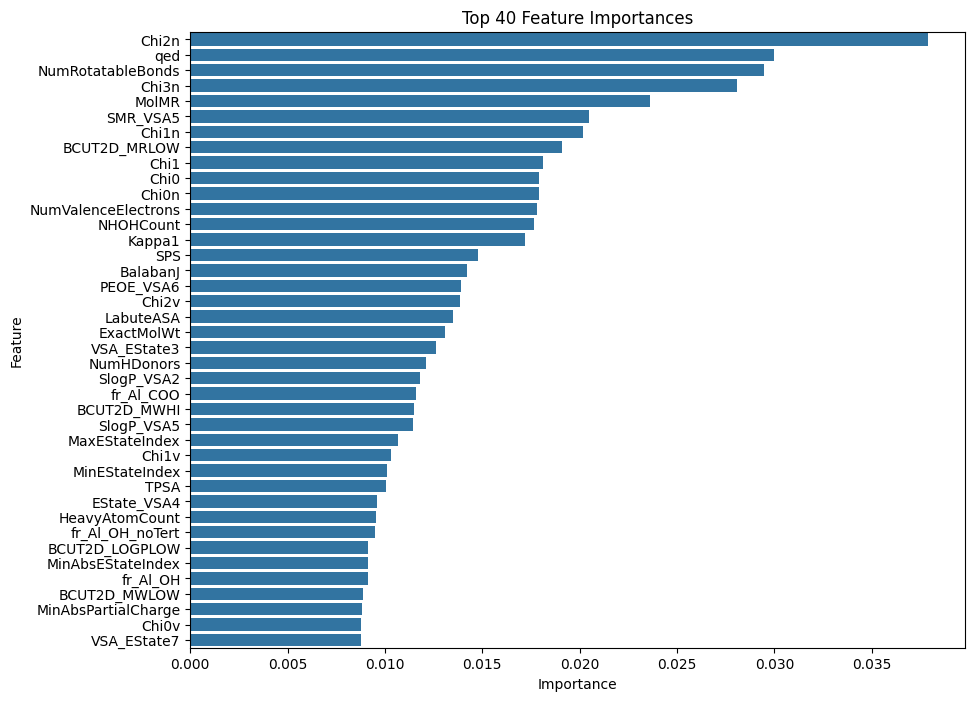

Plot saved to RF_feature_importances.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'descriptors.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and labels
X = data.drop(columns=['Label', 'SMILES'])
y = data['Label']

# Replace infinity values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(40))
plt.title('Top 40 Feature Importances')

# Save the plot to a file
plot_file_path = 'RF_feature_importances.png'  # Replace with your desired file path
plt.savefig(plot_file_path)

# Show the plot
plt.show()

print(f"Plot saved to {plot_file_path}")


trying mutual information

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'descriptors.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and labels
X = data.drop(columns=['Label', 'SMILES'])
y = data['Label']

# Replace infinity values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_imputed)

# Calculate mutual information between each feature and the target
mutual_info = mutual_info_classif(X_standardized, y, random_state=42)

# Create a DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': X,
    'Mutual Information': mutual_info
})

# Sort the DataFrame by mutual information
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the top 20 features based on mutual information
plt.figure(figsize=(10, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df.head(40))
plt.title('Top 40 Features by Mutual Information')

# Save the plot to a file
plot_file_path = 'mutual_information.png'  # Replace with your desired file path
plt.savefig(plot_file_path)

# Show the plot
plt.show()

print(f"Plot saved to {plot_file_path}")


/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/user/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/user/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


ValueError: Input X contains NaN.

check if two smiles notation are referring to the same molecule

In [ ]:
from rdkit import Chem

def are_same_molecule(smiles1, smiles2):
    # Convert the SMILES strings to RDKit Mol objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Check if both molecules were successfully parsed
    if mol1 is None or mol2 is None:
        return False  # Invalid SMILES string

    # Convert to canonical SMILES for comparison
    canonical_smiles1 = Chem.MolToSmiles(mol1, canonical=True)
    canonical_smiles2 = Chem.MolToSmiles(mol2, canonical=True)

    # Compare the canonical SMILES strings
    return canonical_smiles1 == canonical_smiles2

# Example usage
smiles1 = "O[C@@H](CC([O-])=O)C([O-])=O"  # Benzene
smiles2 = "O=C([O-])C[C@H](O)C(=O)[O-]"      # Another representation of Benzene

if are_same_molecule(smiles1, smiles2):
    print("The SMILES strings represent the same molecule.")
else:
    print("The SMILES strings represent different molecules.")


## Length and Weight Analysis

for non-toxic molecules, utlising the canonical representation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors

data = pd.read_csv('non-toxic/non-tox_canonical_smiles.csv')

smiles_list = data['SMILES']

# Function to calculate descriptors and length of SMILES
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol_wt = Descriptors.MolWt(mol)
        exact_mol_wt = Descriptors.ExactMolWt(mol)
        heavy_atom_mol_wt = Descriptors.HeavyAtomMolWt(mol)
        smiles_length = len(smiles)
        return pd.Series([mol_wt, exact_mol_wt, heavy_atom_mol_wt, smiles_length])
    else:
        return pd.Series([None, None, None, None])

# Apply the function to each SMILES and create a new DataFrame
descriptors_df = smiles_list.apply(calculate_descriptors)
descriptors_df.columns = ['MolWt', 'ExactMolWt', 'HeavyAtomMolWt', 'SMILES_Length']

# Combine the original SMILES with the descriptors
final_df = pd.concat([data['SMILES'], descriptors_df], axis=1)

# Save the new DataFrame to a CSV file
output_file = 'non-toxic/non-tox_length_weight.csv'  # Replace with your desired file path
final_df.to_csv(output_file, index=False)

print(f"Descriptor calculations have been saved to {output_file}")



Descriptor calculations have been saved to non-toxic/non-tox_length_weight.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors

data = pd.read_csv('toxic/tox_canonical_smiles.csv')

smiles_list = data['SMILES']

# Function to calculate descriptors and length of SMILES
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol_wt = Descriptors.MolWt(mol)
        exact_mol_wt = Descriptors.ExactMolWt(mol)
        heavy_atom_mol_wt = Descriptors.HeavyAtomMolWt(mol)
        smiles_length = len(smiles)
        return pd.Series([mol_wt, exact_mol_wt, heavy_atom_mol_wt, smiles_length])
    else:
        return pd.Series([None, None, None, None])

# Apply the function to each SMILES and create a new DataFrame
descriptors_df = smiles_list.apply(calculate_descriptors)
descriptors_df.columns = ['MolWt', 'ExactMolWt', 'HeavyAtomMolWt', 'SMILES_Length']

# Combine the original SMILES with the descriptors
final_df = pd.concat([data['SMILES'], descriptors_df], axis=1)

# Save the new DataFrame to a CSV file
output_file = 'toxic/tox_length_weight.csv'  # Replace with your desired file path
final_df.to_csv(output_file, index=False)

print(f"Descriptor calculations have been saved to {output_file}")



[17:26:53] WARNING: not removing hydrogen atom without neighbors


Descriptor calculations have been saved to toxic/tox_length_weight.csv


                      Mean  Standard Deviation          Max      Min  \
MolWt           617.828433          397.862086  6179.373000  2.01600   
ExactMolWt      617.396737          397.621026  6176.017855  2.01565   
HeavyAtomMolWt  561.505450          362.301151  5794.317000  0.00000   
SMILES_Length    82.227546           67.760324   990.000000  1.00000   

                      Range  
MolWt           6177.357000  
ExactMolWt      6174.002205  
HeavyAtomMolWt  5794.317000  
SMILES_Length    989.000000  


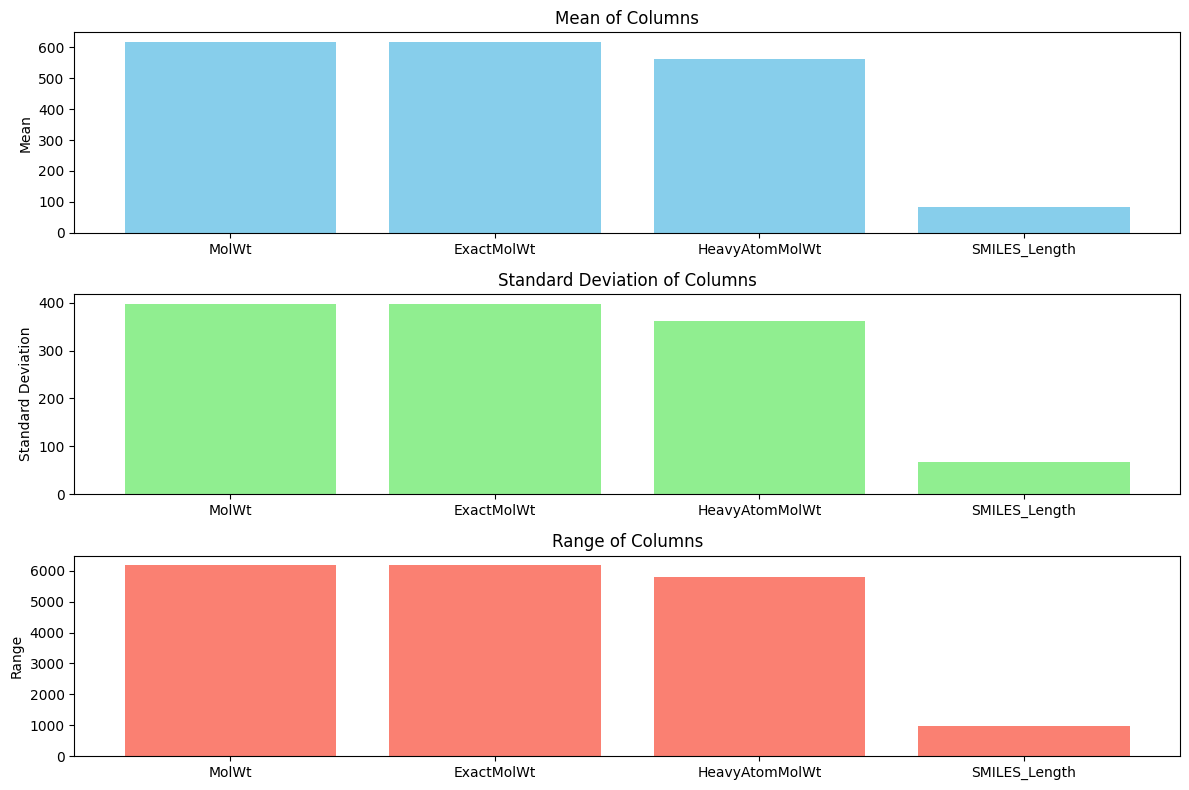

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('non-toxic/non-tox_length_weight.csv')
df = df.drop('SMILES', axis = 1)

# Calculate the mean, standard deviation, and range for each column
statistics = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Max': df.max(),
    'Min': df.min(),
    'Range': df.max() - df.min()
})

print(statistics)

# Plotting the statistics
plt.figure(figsize=(12, 8))

# Plot mean
plt.subplot(3, 1, 1)
plt.bar(statistics.index, statistics['Mean'], color='skyblue')
plt.ylabel('Mean')
plt.title('Mean of Columns')

# Plot standard deviation
plt.subplot(3, 1, 2)
plt.bar(statistics.index, statistics['Standard Deviation'], color='lightgreen')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Columns')

# Plot range
plt.subplot(3, 1, 3)
plt.bar(statistics.index, statistics['Range'], color='salmon')
plt.ylabel('Range')
plt.title('Range of Columns')

plt.tight_layout()
plt.show()


                      Mean  Standard Deviation          Max      Min  \
MolWt           274.692062          174.240184  2264.035000  2.01600   
ExactMolWt      274.248905          174.046856  2264.729863  2.01565   
HeavyAtomMolWt  257.734789          164.491149  2136.019000  0.00000   
SMILES_Length    34.807284           29.005827   349.000000  1.00000   

                      Range  
MolWt           2262.019000  
ExactMolWt      2262.714213  
HeavyAtomMolWt  2136.019000  
SMILES_Length    348.000000  


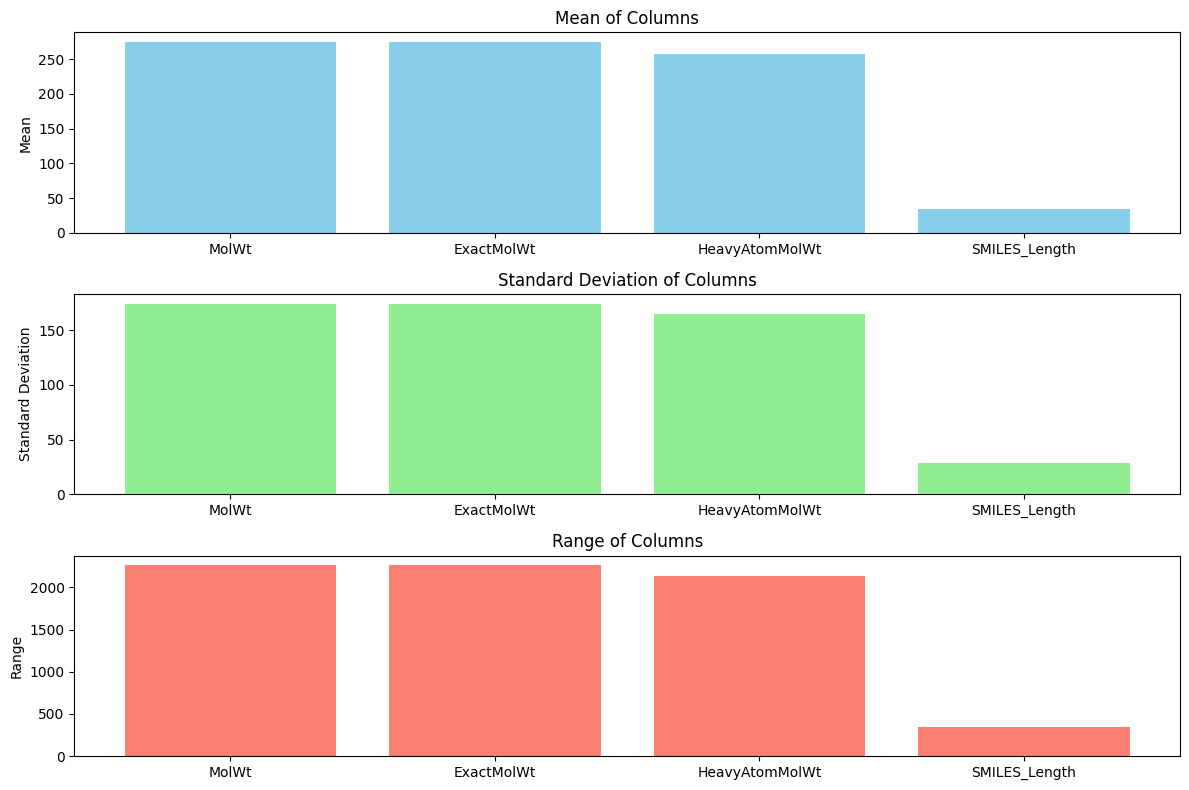

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('toxic/tox_length_weight.csv')
df = df.drop('SMILES', axis = 1)

# Calculate the mean, standard deviation, and range for each column
statistics = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Max': df.max(),
    'Min': df.min(),
    'Range': df.max() - df.min()
})

print(statistics)

# Plotting the statistics
plt.figure(figsize=(12, 8))

# Plot mean
plt.subplot(3, 1, 1)
plt.bar(statistics.index, statistics['Mean'], color='skyblue')
plt.ylabel('Mean')
plt.title('Mean of Columns')

# Plot standard deviation
plt.subplot(3, 1, 2)
plt.bar(statistics.index, statistics['Standard Deviation'], color='lightgreen')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Columns')

# Plot range
plt.subplot(3, 1, 3)
plt.bar(statistics.index, statistics['Range'], color='salmon')
plt.ylabel('Range')
plt.title('Range of Columns')

plt.tight_layout()
plt.show()


looking at the distribution to define bin size

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Toxicology/1k/non-tox_length_weight.csv')
df = df.drop('SMILES', axis = 1)


# Define binning function
def calculate_bins(column, num_bins):
    bin_edges = np.linspace(column.min(), column.max(), num_bins + 1)
    return bin_edges

# Number of bins to create
num_bins = 10  # Adjust as needed

# Plot histograms and bin counts for each column
plt.figure(figsize=(15, 12))

for i, column in enumerate(['MolWt', 'ExactMolWt', 'HeavyAtomMolWt', 'SMILES_Length'], start=1):
    # Calculate bins
    bins = calculate_bins(df[column], num_bins)

    # Add binned data to dataframe
    df[f'{column}_bin'] = pd.cut(df[column], bins=bins, include_lowest=True)

    # Plot histogram
    plt.subplot(2, 2, i)
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Print bin counts
    bin_counts = df[f'{column}_bin'].value_counts().sort_index()
    print(f"Bin counts for {column}:")
    print(bin_counts)
    print("\n")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Toxicology/1k/non-tox_length_weight.csv')
df = df.drop('SMILES', axis = 1)


# Define binning function
def calculate_bins(column, num_bins):
    bin_edges = np.linspace(column.min(), column.max(), num_bins + 1)
    return bin_edges

# Function to save histograms
def save_histogram(column, bins, output_path):
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

# Number of bins to create
num_bins = 10  # Adjust as needed

# Plot histograms and bin counts for each column
for i, column in enumerate(['MolWt', 'ExactMolWt', 'HeavyAtomMolWt', 'SMILES_Length'], start=1):
    # Calculate bins
    bins = calculate_bins(df[column], num_bins)

    # Add binned data to dataframe
    df[f'{column}_bin'] = pd.cut(df[column], bins=bins, include_lowest=True)

    # Save histogram
    output_path = f'/content/drive/MyDrive/Toxicology/1k/histogram_{column}.png'
    save_histogram(column, bins, output_path)

    # Print bin counts
    bin_counts = df[f'{column}_bin'].value_counts().sort_index()
    print(f"Bin counts for {column}:")
    print(bin_counts)
    print("\n")


MolWt

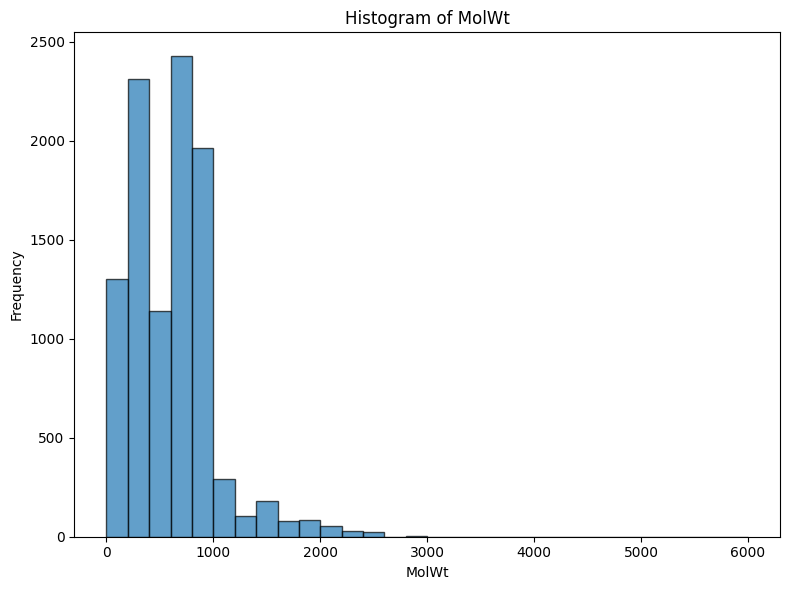

Bin counts for MolWt:
(-0.001, 200.0]     1302
(200.0, 400.0]      2311
(400.0, 600.0]      1138
(600.0, 800.0]      2427
(800.0, 1000.0]     1963
(1000.0, 1200.0]     291
(1200.0, 1400.0]     105
(1400.0, 1600.0]     178
(1600.0, 1800.0]      80
(1800.0, 2000.0]      83
(2000.0, 2200.0]      56
(2200.0, 2400.0]      30
(2400.0, 2600.0]      25
(2600.0, 2800.0]       1
(2800.0, 3000.0]       2
(3000.0, 3200.0]       1
(3200.0, 3400.0]       1
(3400.0, 3600.0]       1
(3600.0, 3800.0]       0
(3800.0, 4000.0]       0
(4000.0, 4200.0]       0
(4200.0, 4400.0]       1
(4400.0, 4600.0]       0
(4600.0, 4800.0]       0
(4800.0, 5000.0]       0
(5000.0, 5200.0]       0
(5200.0, 5400.0]       1
(5400.0, 5600.0]       0
(5600.0, 5800.0]       0
(5800.0, 6000.0]       0
Name: MolWt_bin, dtype: int64




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('non-toxic/non-tox_length_weight.csv')
df = df.drop('SMILES', axis=1)

# Define the bins for MolWt
bins = np.linspace(0, 6000, 31)  # Adjust the range and number of bins as needed

# Function to save and show histogram
def save_and_show_histogram(column, bins, output_path):
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()  # Show the plot

# Add binned data to dataframe
df['MolWt_bin'] = pd.cut(df['MolWt'], bins=bins, include_lowest=True)

# Save and show histogram
output_path = 'non-toxic/histogram_MolWt.png'
save_and_show_histogram('MolWt', bins, output_path)

# Print bin counts
bin_counts = df['MolWt_bin'].value_counts().sort_index()
print(f"Bin counts for MolWt:")
print(bin_counts)
print("\n")


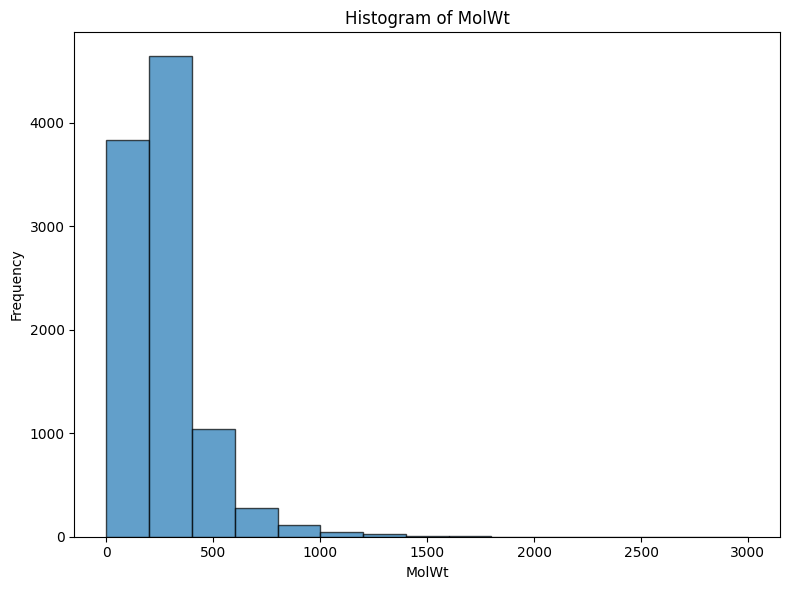

Bin counts for MolWt:
(-0.001, 200.0]     3829
(200.0, 400.0]      4639
(400.0, 600.0]      1045
(600.0, 800.0]       281
(800.0, 1000.0]      118
(1000.0, 1200.0]      46
(1200.0, 1400.0]      22
(1400.0, 1600.0]       6
(1600.0, 1800.0]       6
(1800.0, 2000.0]       0
(2000.0, 2200.0]       0
(2200.0, 2400.0]       2
(2400.0, 2600.0]       0
(2600.0, 2800.0]       0
(2800.0, 3000.0]       0
Name: MolWt_bin, dtype: int64




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('toxic/tox_length_weight.csv')
df = df.drop('SMILES', axis=1)

# Define the bins for MolWt
bins = np.linspace(0, 3000, 16)  # Adjust the range and number of bins as needed

# Function to save and show histogram
def save_and_show_histogram(column, bins, output_path):
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()  # Show the plot

# Add binned data to dataframe
df['MolWt_bin'] = pd.cut(df['MolWt'], bins=bins, include_lowest=True)

# Save and show histogram
output_path = 'toxic/histogram_MolWt.png'
save_and_show_histogram('MolWt', bins, output_path)

# Print bin counts
bin_counts = df['MolWt_bin'].value_counts().sort_index()
print(f"Bin counts for MolWt:")
print(bin_counts)
print("\n")


ExactMolWt

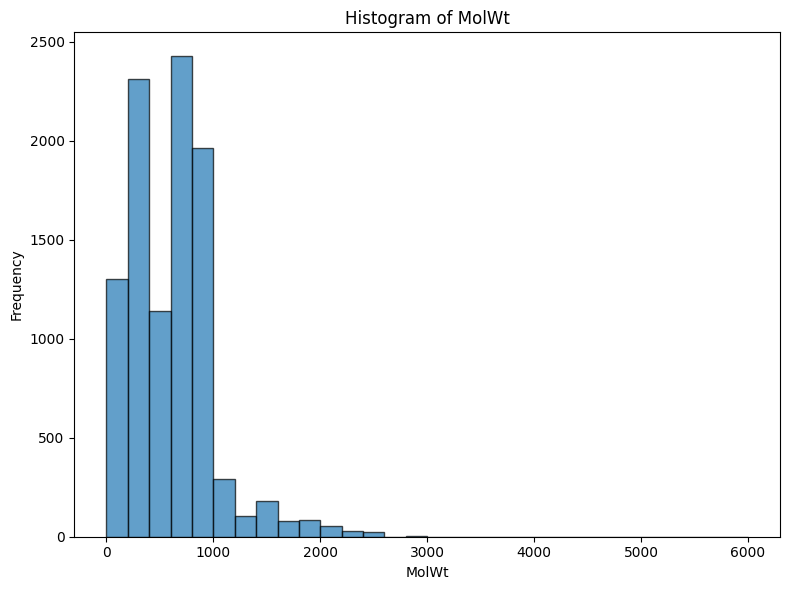

Bin counts for ExactMolWt:
(-0.001, 200.0]     1302
(200.0, 400.0]      2311
(400.0, 600.0]      1138
(600.0, 800.0]      2455
(800.0, 1000.0]     1937
(1000.0, 1200.0]     292
(1200.0, 1400.0]     102
(1400.0, 1600.0]     178
(1600.0, 1800.0]      80
(1800.0, 2000.0]      84
(2000.0, 2200.0]      57
(2200.0, 2400.0]      28
(2400.0, 2600.0]      25
(2600.0, 2800.0]       1
(2800.0, 3000.0]       2
(3000.0, 3200.0]       1
(3200.0, 3400.0]       1
(3400.0, 3600.0]       1
(3600.0, 3800.0]       0
(3800.0, 4000.0]       0
(4000.0, 4200.0]       0
(4200.0, 4400.0]       1
(4400.0, 4600.0]       0
(4600.0, 4800.0]       0
(4800.0, 5000.0]       0
(5000.0, 5200.0]       0
(5200.0, 5400.0]       1
(5400.0, 5600.0]       0
(5600.0, 5800.0]       0
(5800.0, 6000.0]       0
Name: ExactMolWt_bin, dtype: int64




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('non-toxic/non-tox_length_weight.csv')
df = df.drop('SMILES', axis=1)

# Define the bins for MolWt
bins = np.linspace(0, 6000, 31)  # Adjust the range and number of bins as needed

# Function to save and show histogram
def save_and_show_histogram(column, bins, output_path):
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()  # Show the plot

# Add binned data to dataframe
df['ExactMolWt_bin'] = pd.cut(df['ExactMolWt'], bins=bins, include_lowest=True)

# Save and show histogram
output_path = 'non-toxic/histogram_ExactMolWt.png'
save_and_show_histogram('MolWt', bins, output_path)

# Print bin counts
bin_counts = df['ExactMolWt_bin'].value_counts().sort_index()
print(f"Bin counts for ExactMolWt:")
print(bin_counts)
print("\n")


HeavyAtomMolWt

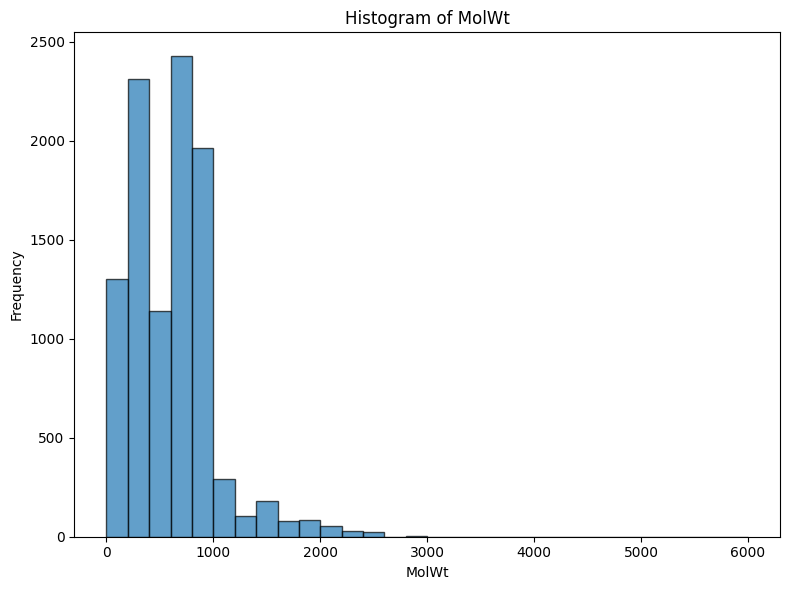

Bin counts for HeavyAtomMolWt:
(-0.001, 200.0]     1421
(200.0, 400.0]      2514
(400.0, 600.0]      1420
(600.0, 800.0]      3212
(800.0, 1000.0]      772
(1000.0, 1200.0]     147
(1200.0, 1400.0]     193
(1400.0, 1600.0]      88
(1600.0, 1800.0]     103
(1800.0, 2000.0]      54
(2000.0, 2200.0]      38
(2200.0, 2400.0]      27
(2400.0, 2600.0]       2
(2600.0, 2800.0]       1
(2800.0, 3000.0]       1
(3000.0, 3200.0]       2
(3200.0, 3400.0]       0
(3400.0, 3600.0]       0
(3600.0, 3800.0]       0
(3800.0, 4000.0]       1
(4000.0, 4200.0]       0
(4200.0, 4400.0]       0
(4400.0, 4600.0]       0
(4600.0, 4800.0]       0
(4800.0, 5000.0]       1
(5000.0, 5200.0]       0
(5200.0, 5400.0]       0
(5400.0, 5600.0]       0
(5600.0, 5800.0]       1
(5800.0, 6000.0]       0
Name: HeavyAtomMolWt_bin, dtype: int64




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('non-toxic/non-tox_length_weight.csv')
df = df.drop('SMILES', axis=1)

# Define the bins for MolWt
bins = np.linspace(0, 6000, 31)  # Adjust the range and number of bins as needed

# Function to save and show histogram
def save_and_show_histogram(column, bins, output_path):
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()  # Show the plot

# Add binned data to dataframe
df['HeavyAtomMolWt_bin'] = pd.cut(df['HeavyAtomMolWt'], bins=bins, include_lowest=True)

# Save and show histogram
output_path = 'non-toxic/histogram_HeavyAtomMolWt.png'
save_and_show_histogram('MolWt', bins, output_path)

# Print bin counts
bin_counts = df['HeavyAtomMolWt_bin'].value_counts().sort_index()
print(f"Bin counts for HeavyAtomMolWt:")
print(bin_counts)
print("\n")


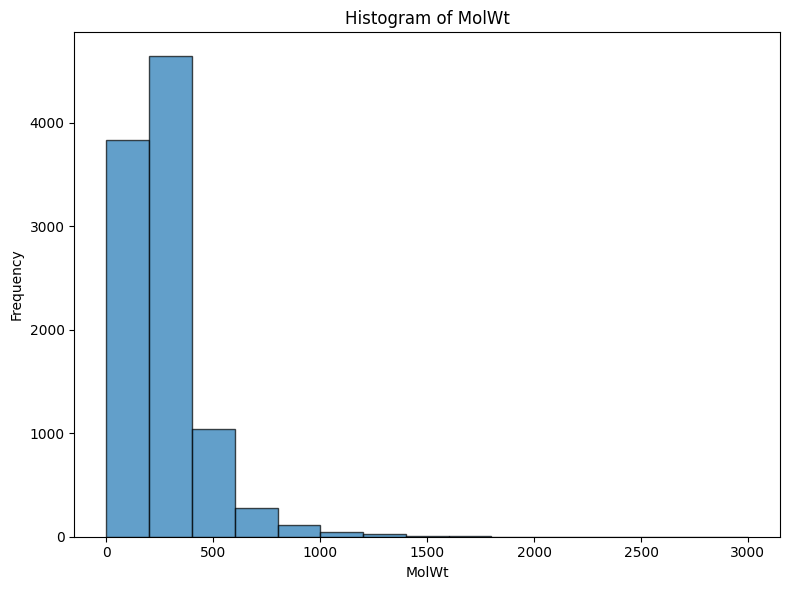

Bin counts for HeavyAtomMolWt:
(-0.001, 200.0]     4231
(200.0, 400.0]      4516
(400.0, 600.0]       833
(600.0, 800.0]       260
(800.0, 1000.0]       90
(1000.0, 1200.0]      39
(1200.0, 1400.0]      17
(1400.0, 1600.0]       5
(1600.0, 1800.0]       1
(1800.0, 2000.0]       0
(2000.0, 2200.0]       2
(2200.0, 2400.0]       0
(2400.0, 2600.0]       0
(2600.0, 2800.0]       0
(2800.0, 3000.0]       0
Name: HeavyAtomMolWt_bin, dtype: int64




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('toxic/tox_length_weight.csv')
df = df.drop('SMILES', axis=1)

# Define the bins for MolWt
bins = np.linspace(0, 3000, 16)  # Adjust the range and number of bins as needed

# Function to save and show histogram
def save_and_show_histogram(column, bins, output_path):
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()  # Show the plot

# Add binned data to dataframe
df['HeavyAtomMolWt_bin'] = pd.cut(df['HeavyAtomMolWt'], bins=bins, include_lowest=True)

# Save and show histogram
output_path = 'toxic/histogram_HeavyAtomMolWt.png'
save_and_show_histogram('MolWt', bins, output_path)

# Print bin counts
bin_counts = df['HeavyAtomMolWt_bin'].value_counts().sort_index()
print(f"Bin counts for HeavyAtomMolWt:")
print(bin_counts)
print("\n")


Length

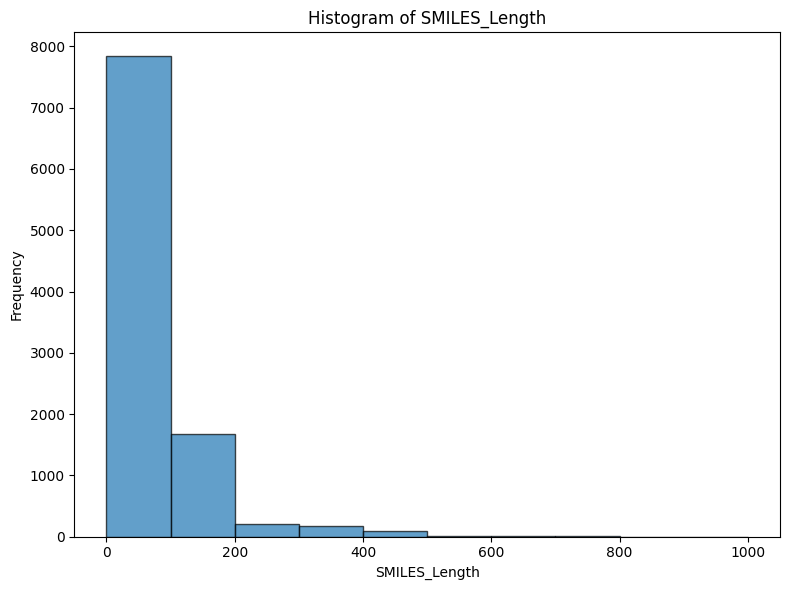

Bin counts for SMILES_Length:
(-0.001, 100.0]    7904
(100.0, 200.0]     1615
(200.0, 300.0]      209
(300.0, 400.0]      170
(400.0, 500.0]       90
(500.0, 600.0]        4
(600.0, 700.0]        2
(700.0, 800.0]        2
(800.0, 900.0]        1
(900.0, 1000.0]       1
Name: SMILES_Length_bin, dtype: int64




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('non-toxic/non-tox_length_weight.csv')
df = df.drop('SMILES', axis=1)

# Define the bins for MolWt
bins = np.linspace(0, 1000, 11)  # Adjust the range and number of bins as needed

# Function to save and show histogram
def save_and_show_histogram(column, bins, output_path):
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()  # Show the plot

# Add binned data to dataframe
df['SMILES_Length_bin'] = pd.cut(df['SMILES_Length'], bins=bins, include_lowest=True)

# Save and show histogram
output_path = 'non-toxic/histogram_SMILES_Length.png'
save_and_show_histogram('SMILES_Length', bins, output_path)

# Print bin counts
bin_counts = df['SMILES_Length_bin'].value_counts().sort_index()
print(f"Bin counts for SMILES_Length:")
print(bin_counts)
print("\n")


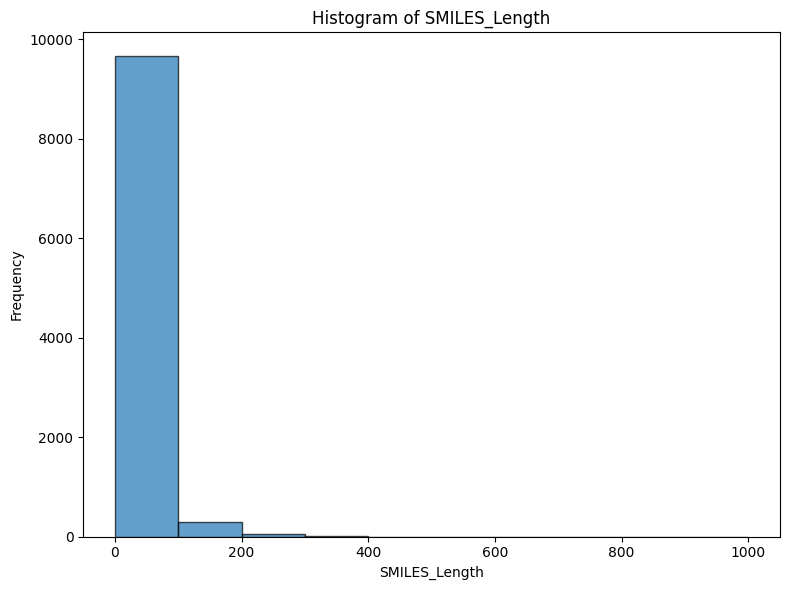

Bin counts for SMILES_Length:
(-0.001, 100.0]    9666
(100.0, 200.0]      279
(200.0, 300.0]       45
(300.0, 400.0]        4
(400.0, 500.0]        0
(500.0, 600.0]        0
(600.0, 700.0]        0
(700.0, 800.0]        0
(800.0, 900.0]        0
(900.0, 1000.0]       0
Name: SMILES_Length_bin, dtype: int64




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('toxic/tox_length_weight.csv')
df = df.drop('SMILES', axis=1)

# Define the bins for MolWt
bins = np.linspace(0, 1000, 11)  # Adjust the range and number of bins as needed

# Function to save and show histogram
def save_and_show_histogram(column, bins, output_path):
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()  # Show the plot

# Add binned data to dataframe
df['SMILES_Length_bin'] = pd.cut(df['SMILES_Length'], bins=bins, include_lowest=True)

# Save and show histogram
output_path = 'toxic/histogram_SMILES_Length.png'
save_and_show_histogram('SMILES_Length', bins, output_path)

# Print bin counts
bin_counts = df['SMILES_Length_bin'].value_counts().sort_index()
print(f"Bin counts for SMILES_Length:")
print(bin_counts)
print("\n")
